In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:99% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:22pt;}
div.text_cell_render.rendered_html{font-size:18pt;}
div.output {font-size:22pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:22pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:22pt;padding:5px;}
table.dataframe{font-size:22px;}
</style>
"""))

<b><font size="7" color="red">ch11. 데이터프레임과 시리즈(Pandas)</font></b>
# 9절 데이터그룹화 및 집계

In [3]:
from statsmodels.api import datasets
iris = datasets.get_rdataset('iris').data
print(iris.shape)
iris.iloc[[0,49,50,99,100,149]]

(150, 5)


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
49,5.0,3.3,1.4,0.2,setosa
50,7.0,3.2,4.7,1.4,versicolor
99,5.7,2.8,4.1,1.3,versicolor
100,6.3,3.3,6.0,2.5,virginica
149,5.9,3.0,5.1,1.8,virginica


# 9.1 groupby
cf. pivot_table

In [11]:
# 1) 그룹화방법1
#    df.groupby(by=[그룹핑할 열])[[함수적용해서출력할열들]].기초통계함수()
    # [[함수적용해서출력할열들]] 생략시 모든 열에 적용됨
iris_grouped = iris.groupby(by='Species')
iris_grouped = iris.groupby(by=iris.Species)
iris_grouped_sum = iris_grouped.sum()
iris_grouped_sum # iris.groupby(by='Species').sum()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Species,,,,
setosa,250.3,171.4,73.1,12.3
versicolor,296.8,138.5,213.0,66.3
virginica,329.4,148.7,277.6,101.3


In [12]:
# setosa와 virginica의 종별 합
iris_grouped_sum.loc[['setosa', 'virginica']]

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Species,,,,
setosa,250.3,171.4,73.1,12.3
virginica,329.4,148.7,277.6,101.3


In [17]:
iris_grouped_sum.reset_index(inplace=True)
iris_grouped_sum

,Species,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,setosa,250.3,171.4,73.1,12.3
1,versicolor,296.8,138.5,213.0,66.3
2,virginica,329.4,148.7,277.6,101.3


In [20]:
# setosa와 virginica의 종별 합
iris_grouped_sum[(iris_grouped_sum['Species']=='setosa' ) | 
                 (iris_grouped_sum['Species']=='virginica' )]

,Species,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,setosa,250.3,171.4,73.1,12.3
2,virginica,329.4,148.7,277.6,101.3


In [21]:
iris_grouped_sum[iris_grouped_sum['Species'].isin(['setosa','virginica'])]

,Species,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,setosa,250.3,171.4,73.1,12.3
2,virginica,329.4,148.7,277.6,101.3


In [23]:
# 1) 그룹화방법1-1 : 그룹핑할 때 index를 컬럼으로 편입
#    df.groupby(by=[그룹핑할 열], as_index=False)[[함수적용해서출력할열들]].기초통계함수()
    # [[함수적용해서출력할열들]] 생략시 모든 열에 적용됨
iris.groupby('Species', as_index=False).sum()

,Species,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,setosa,250.3,171.4,73.1,12.3
1,versicolor,296.8,138.5,213.0,66.3
2,virginica,329.4,148.7,277.6,101.3


In [ ]:
# 1) 그룹화방법1 : 그룹핑할 때 index를 컬럼으로 편입
#    df.groupby(by=[그룹핑할 열])[[함수적용해서출력할열들]].기초통계함수()
    # [[함수적용해서출력할열들]] 생략시 모든 열에 적용됨
# 2) 그룹화방법2 
#    df.pivot_table(index='그룹화할 열',
                #   values=[함수적용해서출력할열들],
                #   aggfunc='기초통계함수')

In [10]:
iris.pivot_table(index='Species',
                 # values=['Sepal.Length'],
                aggfunc='count')

,Petal.Length,Petal.Width,Sepal.Length,Sepal.Width
Species,,,,
setosa,50,50,50,50
versicolor,50,50,50,50
virginica,50,50,50,50


## 다중열 그룹화

In [15]:
# iris를 다중열로 그룹화하기 위해 데이터 추가(num필드)
# 0-25개, 1-25개, 2-25개, 3-25개, 4-25개, 5-5개
import numpy as np
np.array([[i]*25 for i in range(6)]).ravel()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5])

In [18]:
iris['num'] = np.array([[i]*25 for i in range(6)]).ravel()
iris.iloc[::10]

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,num
0,5.1,3.5,1.4,0.2,setosa,0
10,5.4,3.7,1.5,0.2,setosa,0
20,5.4,3.4,1.7,0.2,setosa,0
30,4.8,3.1,1.6,0.2,setosa,1
40,5.0,3.5,1.3,0.3,setosa,1
50,7.0,3.2,4.7,1.4,versicolor,2
60,5.0,2.0,3.5,1.0,versicolor,2
70,5.9,3.2,4.8,1.8,versicolor,2
80,5.5,2.4,3.8,1.1,versicolor,3
90,5.5,2.6,4.4,1.2,versicolor,3


In [19]:
# Species별, num별 합계
r = iris.groupby(by=['Species', 'num']).sum()
r

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
Species    num                                                      
setosa     0           125.7         87.0          36.5          6.2
           1           124.6         84.4          36.6          6.1
versicolor 2           150.3         69.4         107.8         33.6
           3           146.5         69.1         105.2         32.7
virginica  4           164.4         73.2         141.0         51.1
           5           165.0         75.5         136.6         50.2

In [20]:
r.loc[['setosa','virginica']]

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
Species   num                                                      
setosa    0           125.7         87.0          36.5          6.2
          1           124.6         84.4          36.6          6.1
virginica 4           164.4         73.2         141.0         51.1
          5           165.0         75.5         136.6         50.2

In [22]:
r.loc[[ ('setosa',0), ('virginica',4)] ]

,,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Species,num,,,,
setosa,0,125.7,87.0,36.5,6.2
virginica,4,164.4,73.2,141.0,51.1


In [24]:
# Species별, num별 합계(그룹핑할 열을 컬럼 데이터로)
iris.groupby(by=['Species', 'num'], 
             as_index=False)[['Sepal.Length','Sepal.Width']].sum()

,Species,num,Sepal.Length,Sepal.Width
0,setosa,0,125.7,87.0
1,setosa,1,124.6,84.4
2,versicolor,2,150.3,69.4
3,versicolor,3,146.5,69.1
4,virginica,4,164.4,73.2
5,virginica,5,165.0,75.5


In [25]:
iris.pivot_table(index=['Species', 'num'],
                values=['Sepal.Length','Sepal.Width'],
                aggfunc='sum')

Sepal.Length  Sepal.Width
Species    num                           
setosa     0           125.7         87.0
           1           124.6         84.4
versicolor 2           150.3         69.4
           3           146.5         69.1
virginica  4           164.4         73.2
           5           165.0         75.5

In [28]:
iris.groupby('Species')[['Sepal.Length',
                         'Sepal.Width',
                         'Petal.Length',
                         'Petal.Width']].describe()

Sepal.Length                                              \
                  count   mean       std  min    25%  50%  75%  max   
Species                                                               
setosa             50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
versicolor         50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
virginica          50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

           Sepal.Width         ... Petal.Length      Petal.Width         \
                 count   mean  ...          75%  max       count   mean   
Species                        ...                                        
setosa            50.0  3.428  ...        1.575  1.9        50.0  0.246   
versicolor        50.0  2.770  ...        4.600  5.1        50.0  1.326   
virginica         50.0  2.974  ...        5.875  6.9        50.0  2.026   

                                               
                 std  min  25%  50%  75%  max  
Species                                        
setosa      0.105386  0.1  0.2  0.2  0.3  0.6  
versicolor  0.197753  1.0  1.2  1.3  1.5  1.8  
virginica   0.274650  1.4  1.8  2.0  2.3  2.5  

[3 rows x 32 columns]

In [29]:
iris.groupby('Species')[['Sepal.Length',
                         'Sepal.Width',
                         'Petal.Length',
                         'Petal.Width']].describe().T

Species                setosa  versicolor  virginica
Sepal.Length count  50.000000   50.000000  50.000000
             mean    5.006000    5.936000   6.588000
             std     0.352490    0.516171   0.635880
             min     4.300000    4.900000   4.900000
             25%     4.800000    5.600000   6.225000
             50%     5.000000    5.900000   6.500000
             75%     5.200000    6.300000   6.900000
             max     5.800000    7.000000   7.900000
Sepal.Width  count  50.000000   50.000000  50.000000
             mean    3.428000    2.770000   2.974000
             std     0.379064    0.313798   0.322497
             min     2.300000    2.000000   2.200000
             25%     3.200000    2.525000   2.800000
             50%     3.400000    2.800000   3.000000
             75%     3.675000    3.000000   3.175000
             max     4.400000    3.400000   3.800000
Petal.Length count  50.000000   50.000000  50.000000
             mean    1.462000    4.260000   5.552000
             std     0.173664    0.469911   0.551895
             min     1.000000    3.000000   4.500000
             25%     1.400000    4.000000   5.100000
             50%     1.500000    4.350000   5.550000
             75%     1.575000    4.600000   5.875000
             max     1.900000    5.100000   6.900000
Petal.Width  count  50.000000   50.000000  50.000000
             mean    0.246000    1.326000   2.026000
             std     0.105386    0.197753   0.274650
             min     0.100000    1.000000   1.400000
             25%     0.200000    1.200000   1.800000
             50%     0.200000    1.300000   2.000000
             75%     0.300000    1.500000   2.300000
             max     0.600000    1.800000   2.500000

In [31]:
g = iris.groupby('Species')[['Sepal.Length',
                         'Sepal.Width',
                         'Petal.Length',
                         'Petal.Width']].sum()
g

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Species,,,,
setosa,250.3,171.4,73.1,12.3
versicolor,296.8,138.5,213.0,66.3
virginica,329.4,148.7,277.6,101.3


<Axes: xlabel='Species'>

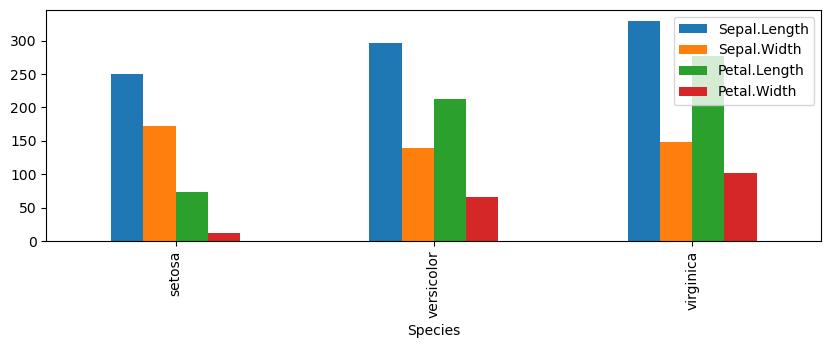

In [33]:
import matplotlib.pyplot as plt
g.plot(kind='bar',figsize=(10,3))